In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib as plt

In [5]:
df = pd.read_csv("archive/merged_data.csv")

In [6]:
df.head()

,Unnamed: 0,player_id,alt_player_id,player_name_x,pos_abbr_x,school_x,school_abbr_x,school_primary_color,school_alt_color,season,...,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
0,0,368,3924331,Justin Smith,DE,Missouri,MIZ,#000000,#000000,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4019,4239824,Bryan Thomas,DE,UAB,UAB,#003b28,#ffc845,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4542,4240031,Derrick Brooks,LB,Florida State,FSU,#782F40,#ceb888,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4559,4240091,Joe Johnson,DE,Louisville,LOU,#ad000a,#cccccc,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,14420,3915189,Royce Smith,OG,Georgia,UGA,#CC0000,#000000,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
columns_to_drop = [
    'Unnamed: 0', 'player_id', 'player_name_x', 'alt_player_id', 'school_abbr_x', 
    'school_primary_color', 'school_alt_color', 'pos_abbr_y', 'school_y', 
    'school_abbr_y', 'pick', 'overall', 'team_logo_espn', 'player_image', 
    'player_name_y', 'traded', 'trade_note', 'link', 'team_abbr', 'guid', 'draft_year'
]

# Create dummy variables for categorical features
df = pd.get_dummies(df, columns=['school_x', 'pos_abbr_x', 'school_name', 'position', 'team'])

# Create a binary column for drafted/not drafted
df['drafted'] = ~df['round'].isna().astype(int)

# Now define the target variable
y = df['drafted']

# Drop the unnecessary columns, including those you created dummies from if they're no longer needed
df = df.drop(columns_to_drop + ['round'], axis=1, errors='ignore')

# Fill NaN values with 0
df = df.fillna(0)

# Your features are the remaining columns
X = df.drop(['drafted'], axis=1)


In [23]:
y

0      -2
1      -2
2      -2
3      -2
4      -2
       ..
1121   -2
1122   -2
1123   -2
1124   -2
1125   -2
Name: drafted, Length: 1126, dtype: int64

In [24]:
X

,season,active,all_star,Assist Tackles,Completion Percentage,Completions,Extra Points Made,FGM 1-19 yards,FGM 20-29 yards,FGM 30-39 yards,...,team_New York Jets,team_Oakland Raiders,team_Philadelphia Eagles,team_Pittsburgh Steelers,team_San Francisco 49ers,team_Seattle Seahawks,team_Tampa Bay Buccaneers,team_Tennessee Titans,team_Washington,team_Washington Redskins
0,2016,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2018,True,False,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2020,True,False,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2020,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2017,True,False,52.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2020,True,False,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1122,2020,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1123,2020,True,False,0.0,0.0,0.0,12.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1124,2020,True,False,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
# basic SVM 
lin_model = SVC(kernel='linear', random_state=42)
lin_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [11]:
y_pred = lin_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  26]
 [ 38 203]]
              precision    recall  f1-score   support

          -2       0.83      0.88      0.85       210
          -1       0.89      0.84      0.86       241

    accuracy                           0.86       451
   macro avg       0.86      0.86      0.86       451
weighted avg       0.86      0.86      0.86       451


In [12]:
poly_svm = SVC(kernel='poly', random_state=42)
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [13]:
y_pred = poly_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142  68]
 [  8 233]]
              precision    recall  f1-score   support

          -2       0.95      0.68      0.79       210
          -1       0.77      0.97      0.86       241

    accuracy                           0.83       451
   macro avg       0.86      0.82      0.82       451
weighted avg       0.85      0.83      0.83       451


In [14]:
rbf_svm = SVC(kernel="rbf", random_state=42)
rbf_svm.fit(X_train, y_train)

SVC(random_state=42)

In [15]:
y_pred = rbf_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121  89]
 [  2 239]]
              precision    recall  f1-score   support

          -2       0.98      0.58      0.73       210
          -1       0.73      0.99      0.84       241

    accuracy                           0.80       451
   macro avg       0.86      0.78      0.78       451
weighted avg       0.85      0.80      0.79       451


In [50]:
sig_svm = SVC(kernel="sigmoid", random_state=42)
sig_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [51]:
y_pred = sig_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108 102]
 [  0 241]]
              precision    recall  f1-score   support

          -2       1.00      0.51      0.68       210
          -1       0.70      1.00      0.83       241

    accuracy                           0.77       451
   macro avg       0.85      0.76      0.75       451
weighted avg       0.84      0.77      0.76       451


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Example range
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Example range
    'degree': [2, 3, 4],  # Only for poly kernel
    'kernel': ['rbf', 'poly']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# The best hyperparameters found
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_parameters}")
print(f"Best cross-validated score: {best_score}")


Best parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validated score: 0.8622222222222223


In [16]:
best_model = SVC(C=10, degree=3, gamma='scale', kernel='poly')
best_model.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [20]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[183  27]
 [ 25 216]]
              precision    recall  f1-score   support

          -2       0.88      0.87      0.88       210
          -1       0.89      0.90      0.89       241

    accuracy                           0.88       451
   macro avg       0.88      0.88      0.88       451
weighted avg       0.88      0.88      0.88       451


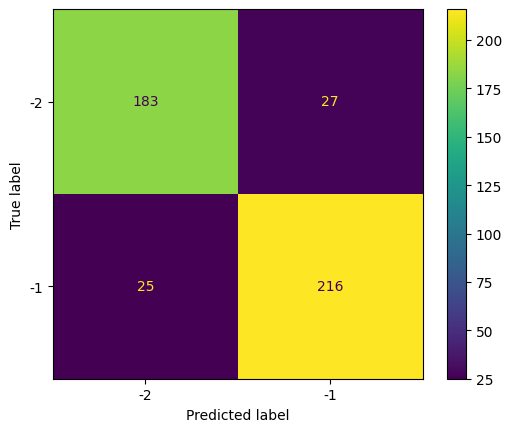

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

In [55]:
# Perform permutation importance
results = permutation_importance(best_model, X_test, y_test, scoring='accuracy')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')

Feature: season, Score: 0.00000
Feature: active, Score: 0.00000
Feature: all_star, Score: 0.00000
Feature: Assist Tackles, Score: 0.00000
Feature: Completion Percentage, Score: 0.00000
Feature: Completions, Score: 0.00399
Feature: Extra Points Made, Score: 0.00000
Feature: FGM 1-19 yards, Score: 0.00000
Feature: FGM 20-29 yards, Score: 0.00000
Feature: FGM 30-39 yards, Score: 0.00000
Feature: FGM 40-49 yards, Score: 0.00000
Feature: FGM 50+ yards, Score: 0.00000
Feature: Field Goal Attempts, Score: 0.00000
Feature: Field Goal Made, Score: 0.00000
Feature: Field Goal Percentage, Score: 0.00000
Feature: Field Goals, Score: 0.00000
Feature: Forced Fumbles, Score: 0.00000
Feature: Gross Average Punt Yards, Score: 0.00000
Feature: Interception Touchdowns, Score: 0.00000
Feature: Interception Yards, Score: 0.00000
Feature: Interceptions, Score: 0.00000
Feature: Kick Extra Points, Score: 0.00000
Feature: Kick Return Touchdowns, Score: 0.00000
Feature: Kick Return Yards, Score: 0.00000
Feature

In [56]:
for i, v in enumerate(importance): 
    if v > .001: 
        print(f'Feature: {X.columns[i]}, Score: {v:.5f}')


Feature: Completions, Score: 0.00399
Feature: Passer Rating, Score: 0.00532
Feature: Passing Yards, Score: 0.00710
Feature: Rushing Yards, Score: 0.00754
Feature: Total Points, Score: 0.00222
Feature: weight, Score: 0.30244
Feature: ovr_rk, Score: 0.15078
Feature: grade, Score: 0.00576
